In [1931]:
# Importing the libraries to read and analyze the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding Data

In [1932]:
#Uploading the Data Set
leadscore = pd.read_csv("Leads.csv")

###### Checking the data of the dataset

In [1933]:
# Inspecting the data set
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1934]:
# Info about the columns
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Dropping columns with data generated by the sales team

In [1935]:
leadscore.drop(["Last Activity" , "Last Notable Activity", "Tags","Lead Profile","Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"], axis = 1, inplace = True)

In [1936]:
# Info about the columns
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1937]:
leadscore.shape

(9240, 28)

###### Checking The Data Quality and its values

In [1938]:
# Checking for null values
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [1939]:
# Checking for missing values
leadscore.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [1940]:
# Checking for duplicates and dropping them if any
leadscore.drop_duplicates(inplace = True)
leadscore.shape

(9240, 28)

In [1941]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


# Data Cleaning Part

In [1942]:
missing_values = {}
for x in leadscore.columns:
    y = leadscore[x].isna().sum()/len(leadscore.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
Newspaper                                         0.0000

In [1943]:
leadscore["How did you hear about X Education"].value_counts(normalize = True,dropna = False)*100

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [1944]:
leadscore = leadscore.replace("Select", np.nan)

In [1945]:
missing_values = {}
for x in leadscore.columns:
    y = leadscore[x].isna().sum()/len(leadscore.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

How did you hear about X Education               78.463203
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
Newspaper                                         0.0000

In [1946]:
columns_name = []
for x in leadscore.columns:
    if leadscore[x].isna().sum() != 0:
        y = leadscore[x].isna().sum()/len(leadscore.index)*100
        if y > 40:
            columns_name += [x]
len(columns_name)

1

In [1947]:
columns_name

['How did you hear about X Education']

In [1948]:
for x in columns_name:
    leadscore.drop(x, axis = 1, inplace = True)

In [1949]:
leadscore.drop(["Lead Number"], axis = 1, inplace = True)

In [1950]:
leadscore.shape

(9240, 26)

In [1951]:
missing_values = {}
for x in leadscore.columns:
    y = leadscore[x].isna().sum()/len(leadscore.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Source                                       0.389610
Prospect ID                                       0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Search                                            0.0000

In [1952]:
leadscore.City.value_counts(normalize = True,dropna = False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [1953]:
leadscore.City = leadscore.City.replace(np.nan, "unknown")

In [1954]:
leadscore.City.value_counts(dropna = False)

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1955]:
leadscore.Specialization.value_counts(normalize = True, dropna = False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [1956]:
leadscore.Specialization = leadscore.Specialization.replace(np.nan, "Others")

In [1957]:
leadscore.Specialization.value_counts(dropna = False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1958]:
leadscore["What matters most to you in choosing a course"].value_counts(normalize = True,dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [1959]:
leadscore["What matters most to you in choosing a course"] = leadscore["What matters most to you in choosing a course"].replace(np.nan, "Better Career Prospects")

In [1960]:
leadscore["What matters most to you in choosing a course"].value_counts(dropna = False,normalize = True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [1961]:
#Drop the column for data imbalance
leadscore.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True)

In [1962]:
leadscore["What is your current occupation"].value_counts(normalize = True,dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [1963]:
leadscore["What is your current occupation"] = leadscore["What is your current occupation"].replace(np.nan, "unknown")

In [1964]:
leadscore["What is your current occupation"].value_counts(dropna = False, normalize = True)*100

Unemployed              60.606061
unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [1965]:
leadscore.Country.value_counts(normalize = True,dropna = False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [1966]:
leadscore.Country = leadscore.Country.replace(np.nan, "unknown")

In [1967]:
leadscore.Country.value_counts(dropna = False)

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [1968]:
missing_values = {}
for x in leadscore.columns:
    y = leadscore[x].isnull().sum()/len(leadscore.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.000000
Lead Origin                                 0.000000
What is your current occupation             0.000000
Specialization                              0.

In [1969]:
leadscore.shape

(9240, 25)

In [1970]:
leadscore.dropna(inplace = True)

In [1971]:
missing_values = {}
for x in leadscore.columns:
    y = leadscore[x].isnull().sum()/len(leadscore.index)*100
    missing_values[x] = y
missing_values_df = pd.Series(missing_values)
missing_values_df.sort_values(ascending = False)

Prospect ID                                 0.0
Magazine                                    0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Origin                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [1972]:
leadscore.shape

(9074, 25)

In [1973]:
len(leadscore.index)

9074

In [1974]:
#percentage of rows retained in the data cleaning process
len(leadscore.index)/9240 *100


98.2034632034632

In [1975]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Origin                               9074 non-null   object 
 2   Lead Source                               9074 non-null   object 
 3   Do Not Email                              9074 non-null   object 
 4   Do Not Call                               9074 non-null   object 
 5   Converted                                 9074 non-null   int64  
 6   TotalVisits                               9074 non-null   float64
 7   Total Time Spent on Website               9074 non-null   int64  
 8   Page Views Per Visit                      9074 non-null   float64
 9   Country                                   9074 non-null   object 
 10  Specialization                      

In [1976]:
pd.set_option('display.max_columns', None)
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,unknown,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,unknown,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,India,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,unknown,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [1977]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["Update me on Supply Chain Content"].value_counts(dropna = False, normalize = True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [1978]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["Get updates on DM Content"].value_counts(dropna = False, normalize = True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [1979]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["I agree to pay the amount through cheque"].value_counts(dropna = False, normalize = True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [1980]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["Receive More Updates About Our Courses"].value_counts(dropna = False, normalize = True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [1981]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["Do Not Call"].value_counts(dropna = False, normalize = True)*100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

In [1982]:
#dropping columns with Skewed data with data imbalance more than 90 percent
leadscore["Magazine"].value_counts(dropna = False, normalize = True)*100

No    100.0
Name: Magazine, dtype: float64

In [1983]:
leadscore.drop(["Receive More Updates About Our Courses","Do Not Call","Magazine"], axis = 1, inplace = True)

In [1984]:
leadscore.drop(["Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"], axis = 1, inplace = True)

In [1985]:
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,unknown,Others,Unemployed,No,No,No,No,No,No,unknown,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,Others,Unemployed,No,No,No,No,No,No,unknown,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Others,Unemployed,No,No,No,No,No,No,Mumbai,No


In [1986]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

##  Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [1987]:
# List of variables to map

varlist =  ['Do Not Email', 'Newspaper', 'A free copy of Mastering The Interview',"Search","Newspaper Article","X Education Forums","Digital Advertisement","Through Recommendations"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadscore[varlist] = leadscore[varlist].apply(binary_map)

In [1988]:
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,unknown,Others,Unemployed,0,0,0,0,0,0,unknown,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Others,Unemployed,0,0,0,0,0,0,unknown,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,0,0,0,0,0,0,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Others,Unemployed,0,0,0,0,0,0,Mumbai,0


#### For categorical variables with multiple levels, create dummy features 

In [1989]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadscore[['Lead Origin', 'Lead Source', 'Country', 'Specialization','What is your current occupation','City']], drop_first=True)

# Adding the results to the master dataframe
leadscore = pd.concat([leadscore, dummy1], axis=1)

In [1990]:
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,unknown,Others,Unemployed,0,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,India,Others,Unemployed,0,0,0,0,0,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Business Administration,Student,0,0,0,0,0,0,Mumbai,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Others,Unemployed,0,0,0,0,0,0,Mumbai,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [1991]:
leadscore.shape

(9074, 109)

In [1992]:
# We have created dummies for the below variables, so we can drop them
leadscore = leadscore.drop(['Lead Origin', 'Lead Source', 'Country', 'Specialization','What is your current occupation','City'], 1)

In [1993]:
leadscore.shape

(9074, 103)

In [1994]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 103 entries, Prospect ID to City_unknown
dtypes: float64(2), int64(10), object(1), uint8(90)
memory usage: 1.7+ MB


###Checking for Outliers

In [1995]:
leadscore.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,0.000441,0.000771,0.318272,0.538351,0.064029,0.003306,0.280251,0.003416,0.316068,0.000220,0.000110,0.193189,0.127177,0.000110,0.000220,0.048821,0.013776,0.000220,0.000110,0.014216,0.000661,0.000110,0.000551,0.000110,0.000110,0.000110,0.001433,0.000771,0.000

In [1996]:
# Checking for outliers in the continuous variables
num_leadscore = leadscore[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [1997]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leadscore.describe(percentiles=[.25, .5, .75, .90, .95, .99,.999,.9999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [1998]:
leadscore=leadscore[~(leadscore["TotalVisits"]>32)]

In [1999]:
# Checking for outliers in the continuous variables
num_leadscore = leadscore[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [2000]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leadscore.describe(percentiles=[.25, .5, .75, .90, .95, .99,.999,.9999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9065.000000,9065.000000,9065.000000
mean,3.369443,482.783012,2.361793
std,3.433290,545.304645,2.085738
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.000000,3.000000
90%,7.000000,1373.600000,5.000000
95%,10.000000,1557.000000,6.000000
99%,16.000000,1839.000000,9.000000


#### Treated outliers in Totalvisits

## Test-Train Split

In [2001]:
from sklearn.model_selection import train_test_split

In [2002]:
# Putting feature variable to X
X = leadscore.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [2003]:
# Putting response variable to y
y = leadscore['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2004]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Feature Scaling

In [2005]:
from sklearn.preprocessing import StandardScaler

In [2006]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown
2179,0,0.470264,-0.656894,1.274238,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3504,0,-0.108333,-0.088858,0.311235,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5038,0,1.916756,1.548424,0.070484,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3460,0,-0.397631,0.349236,-0.170266,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7421,1,6.834829,-0.482399,0.046409,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [2007]:
### Checking the converted Rate
Converted = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
Converted

37.881963596249314

We have almost 38% converted rate

## Looking at Correlations

In [2008]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2009]:
# Let's see the correlation matrix 
# plt.figure(figsize = (20,10))        # Size of the figure
# sns.heatmap(leadscore.corr(),annot = True)
# plt.show()

Dropping highly correlated dummy variables

## Model Building

Running Your First Training Model

In [2010]:
import statsmodels.api as sm

In [2011]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6345
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           98
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.6
Date:                Tue, 18 Oct 2022   Deviance:                       5519.2
Time:                        16:08:19   Pearson chi2:                 6.39e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3649
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   47.7527   1.62e+05      0.000      1.000   -3.17e+05    3.17e+05
Do Not Email                                            -1.3432      0.168     -7.986      0.000      -1.673      -1.014
TotalVisits                                              0.2163      0.046      4.708      0.000       0.126       0.306
Total Time Spent on Website                              1.1122      0.040     27.695      0.000       1.034       1.191
Page Views Per Visit                                    -0.0751      0.052     -1.448      0.148      -0.177       0.027
Search                                                   0.0437      0.811      0.054      0.957      -1.546       1.633
Newspaper Article                                       24.9425   1.18e+05      0.000      1.000   -2.31e+05    2.31e+05
X Education Forums                                     -50.7878   1.89e+05     -0.000      1.000   -3.71e+05    3.71e+05
Newspaper                                              -26.3330   1.17e+05     -0.000      1.000   -2.29e+05    2.29e+05
Digital Advertisement                                    0.5512      1.867      0.295      0.768      -3.108       4.210
Through Recommendations                                  0.7673      1.428      0.537      0.591      -2.032       3.567
A free copy of Mastering The Interview                  -0.2648      0.107     -2.466      0.014      -0.475      -0.054
Lead Origin_Landing Page Submission                     -0.7765      0.148     -5.236      0.000      -1.067      -0.486
Lead Origin_Lead Add Form                               -1.2575      1.717     -0.732      0.464      -4.623       2.108
Lead Origin_Lead Import                                 21.0742   1.26e+05      0.000      1.000   -2.47e+05    2.48e+05
Lead Source_Direct Traffic                             -23.8004   9.54e+04     -0.000      1.000   -1.87e+05    1.87e+05
Lead Source_Facebook                                   -45.4305   1.58e+05     -0.000      1.000    -3.1e+05     3.1e+05
Lead Source_Google                                     -23.5668   9.54e+04     -0.000      1.000   -1.87e+05    1.87e+05
Lead Source_Live Chat                                    2.8432   1.54e+05   1.84e-05      1.000   -3.02e+05    3.02e+05
Lead Source_NC_EDM                                       1.7709   1.67e+05   1.06e-05      1.000   -3.27e+05    3.27e+05
Lead Source_Olark Chat                                 -23.6079   9.54e+04     -0.000      1.000   -1.87e+05    1.87e+05
Lead Source_Organic Search                             -23.6437   9.54e+04     -0.000      1.000   -1.87e+05    1.87e+05
Lead Source_Pay per Click Ads                          -46

## Feature Selection Using RFE - Model 1

In [2012]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2013]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [2014]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False])

In [2015]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 70),
 ('Search', False, 86),
 ('Newspaper Article', False, 22),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 62),
 ('Through Recommendations', False, 66),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', False, 44),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social 

In [2016]:
col = X_train.columns[rfe.support_]

In [2017]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Country_Nigeria', 'Country_Saudi Arabia', 'Country_unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

##### Assessing the model with StatsModels

In [2018]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6345
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.6
Date:                Tue, 18 Oct 2022   Deviance:                       5707.3
Time:                        16:08:26   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3458
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7345      0.045    -16.461      0.000      -0.822      -0.647
Do Not Email                                            -1.3907      0.163     -8.522      0.000      -1.711      -1.071
Total Time Spent on Website                              1.1199      0.039     28.553      0.000       1.043       1.197
Lead Origin_Lead Add Form                                2.6261      0.224     11.712      0.000       2.187       3.066
Lead Source_Welingak Website                             1.9103      0.748      2.553      0.011       0.444       3.377
Country_Nigeria                                        -21.8226   2.12e+04     -0.001      0.999   -4.15e+04    4.15e+04
Country_Saudi Arabia                                    -1.2504      0.767     -1.631      0.103      -2.753       0.252
Country_unknown                                          1.0660      0.095     11.196      0.000       0.879       1.253
What is your current occupation_Housewife               22.5751   1.71e+04      0.001      0.999   -3.34e+04    3.34e+04
What is your current occupation_Working Professional     2.4158      0.175     13.785      0.000       2.072       2.759
What is your current occupation_unknown                 -1.4051      0.083    -16.833      0.000      -1.569      -1.242
========================================================================================================================
"""

In [2019]:
# As P value of days is greaterthan 0.05, drop the features
col = col.drop(['Country_Nigeria'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Country_unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [2020]:
leadscore[col].corr()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Country_Saudi Arabia,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Working Professional,What is your current occupation_unknown
Do Not Email,1.000000,-0.047096,-0.031023,0.003107,0.028655,-0.053984,-0.009190,-0.046895,0.052269
Total Time Spent on Website,-0.047096,1.000000,-0.188559,-0.092064,0.005119,-0.469396,0.006912,0.096918,-0.147982
Lead Origin_Lead Add Form,-0.031023,-0.188559,1.000000,0.459130,-0.012610,0.420731,0.034656,0.191230,-0.169541
Lead Source_Welingak Website,0.003107,-0.092064,0.459130,1.000000,-0.005790,0.195299,-0.003788,-0.034134,-0.077841
Country_Saudi Arabia,0.028655,0.005119,-0.012610,-0.005790,1.000000,-0.028105,-0.001519,-0.004961,-0.006077
Country_unknown,-0.053984,-0.469396,0.420731,0.195299,-0.028105,1.000000,-0.002290,0.030041,0.096500
What is your current occupation_Housewife,-0.009190,0.006912,0.034656,-0.003788,-0.001519,-0.002290,1.000000,-0.008956,-0.020424
What is your current occupation_Working Professional,-0.046895,0.096918,0.191230,-0.034134,-0.004961,0.030041,-0.008956,1.000000,-0.184057
What is your current occupation_unknown,0.052269,-0.147982,-0.169541,-0.077841,-0.006077,0.096500,-0.020424,-0.184057,1.000000


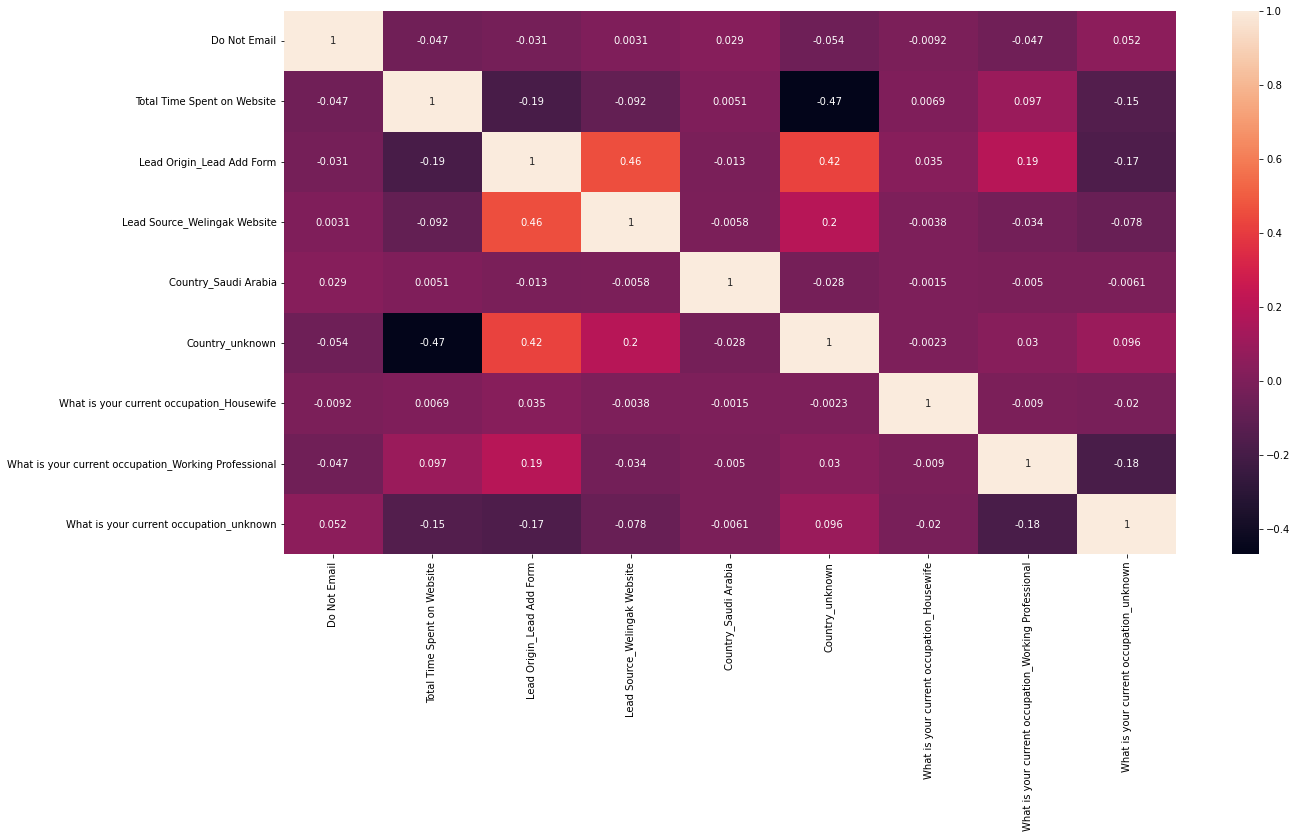

In [2021]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leadscore[col].corr(),annot = True)
plt.show()

Assessing the model with StatsModels

In [2022]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6345
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.4
Date:                Tue, 18 Oct 2022   Deviance:                       5710.8
Time:                        16:08:27   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3455
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7367      0.045    -16.514      0.000      -0.824      -0.649
Do Not Email                                            -1.3891      0.163     -8.512      0.000      -1.709      -1.069
Total Time Spent on Website                              1.1197      0.039     28.557      0.000       1.043       1.197
Lead Origin_Lead Add Form                                2.6265      0.224     11.714      0.000       2.187       3.066
Lead Source_Welingak Website                             1.9102      0.748      2.553      0.011       0.444       3.377
Country_Saudi Arabia                                    -1.2487      0.767     -1.629      0.103      -2.752       0.254
Country_unknown                                          1.0676      0.095     11.212      0.000       0.881       1.254
What is your current occupation_Housewife               22.5770    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
What is your current occupation_Working Professional     2.4176      0.175     13.795      0.000       2.074       2.761
What is your current occupation_unknown                 -1.4037      0.083    -16.819      0.000      -1.567      -1.240
========================================================================================================================
"""

In [2023]:
# As P value of days is greaterthan 0.05, drop the features
col = col.drop(['What is your current occupation_Housewife'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Country_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [2024]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6345
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.2
Date:                Tue, 18 Oct 2022   Deviance:                       5718.4
Time:                        16:08:27   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3447
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7325      0.045    -16.446      0.000      -0.820      -0.645
Do Not Email                                            -1.3921      0.163     -8.531      0.000      -1.712      -1.072
Total Time Spent on Website                              1.1182      0.039     28.541      0.000       1.041       1.195
Lead Origin_Lead Add Form                                2.6492      0.224     11.834      0.000       2.210       3.088
Lead Source_Welingak Website                             1.8883      0.748      2.524      0.012       0.422       3.355
Country_Saudi Arabia                                    -1.2503      0.766     -1.631      0.103      -2.753       0.252
Country_unknown                                          1.0617      0.095     11.163      0.000       0.875       1.248
What is your current occupation_Working Professional     2.4137      0.175     13.774      0.000       2.070       2.757
What is your current occupation_unknown                 -1.4056      0.083    -16.847      0.000      -1.569      -1.242
========================================================================================================================
"""

In [2025]:
# As P value of days is greaterthan 0.05, drop the features
col = col.drop(['Country_Saudi Arabia'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Country_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [2026]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6345
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.7
Date:                Tue, 18 Oct 2022   Deviance:                       5721.4
Time:                        16:08:27   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3444
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7355      0.044    -16.529      0.000      -0.823      -0.648
Do Not Email                                            -1.3993      0.163     -8.566      0.000      -1.720      -1.079
Total Time Spent on Website                              1.1173      0.039     28.543      0.000       1.041       1.194
Lead Origin_Lead Add Form                                2.6500      0.224     11.837      0.000       2.211       3.089
Lead Source_Welingak Website                             1.8885      0.748      2.524      0.012       0.422       3.355
Country_unknown                                          1.0640      0.095     11.191      0.000       0.878       1.250
What is your current occupation_Working Professional     2.4104      0.175     13.763      0.000       2.067       2.754
What is your current occupation_unknown                 -1.4049      0.083    -16.839      0.000      -1.568      -1.241
========================================================================================================================
"""

Checking VIFs

In [2027]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2028]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_unknown,1.77
2,Lead Origin_Lead Add Form,1.73
3,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.24
6,What is your current occupation_unknown,1.22
5,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.04


There are no features with high VIF

In [2029]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2179    0.053437
3504    0.302639
5038    0.729995
3460    0.414529
7421    0.064536
421     0.218139
5351    0.469719
7788    0.078097
8242    0.954347
1307    0.542175
dtype: float64

In [2030]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05343674, 0.30263924, 0.72999455, 0.41452899, 0.06453596,
       0.21813896, 0.46971936, 0.07809729, 0.95434747, 0.54217531])

#### Creating a dataframe with the actual lead score and the predicted probabilities

In [2031]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.053437,2179
1,0,0.302639,3504
2,0,0.729995,5038
3,0,0.414529,3460
4,1,0.064536,7421


In [2032]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.053437,2179,0
1,0,0.302639,3504,1
2,0,0.729995,5038,1
3,0,0.414529,3460,1
4,1,0.064536,7421,0


In [2033]:
from sklearn import metrics

In [2034]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2913 1048]
 [ 420 1964]]


In [2035]:
# Predicted     not_converted    converted
# Actual
# not_converted        3839          122
# converted            1524          860 

In [2036]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7686367218282112


In [2037]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2038]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8238255033557047

### Plotting the ROC Curve

In [2039]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2040]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

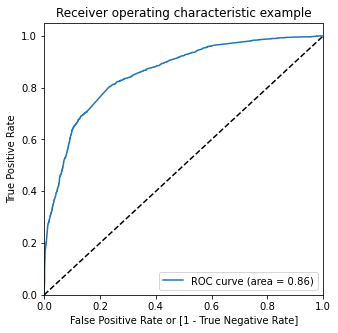

In [2041]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

 ### Finding Optimal Cutoff Point

In [2042]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.053437,2179,0,1,0,0,0,0,0,0,0,0,0
1,0,0.302639,3504,1,1,1,1,1,0,0,0,0,0,0
2,0,0.729995,5038,1,1,1,1,1,1,1,1,1,0,0
3,0,0.414529,3460,1,1,1,1,1,1,0,0,0,0,0
4,1,0.064536,7421,0,1,0,0,0,0,0,0,0,0,0


In [2043]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375729  1.000000  0.000000
0.1   0.1  0.527660  0.982383  0.253976
0.2   0.2  0.688101  0.900168  0.560465
0.3   0.3  0.768637  0.823826  0.735420
0.4   0.4  0.801103  0.683305  0.872002
0.5   0.5  0.800315  0.633389  0.900783
0.6   0.6  0.780772  0.553272  0.917698
0.7   0.7  0.761387  0.460990  0.942186
0.8   0.8  0.736328  0.351930  0.967685
0.9   0.9  0.691726  0.188339  0.994698


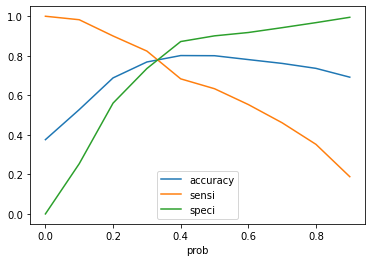

In [2044]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [2045]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.053437,2179,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.302639,3504,1,1,1,1,1,0,0,0,0,0,0,1
2,0,0.729995,5038,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.414529,3460,1,1,1,1,1,1,0,0,0,0,0,1
4,1,0.064536,7421,0,1,0,0,0,0,0,0,0,0,0,0


In [2046]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7686367218282112

In [2047]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2913, 1048],
       [ 420, 1964]], dtype=int64)

In [2048]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2049]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8238255033557047

## Making predictions on the test set

In [2050]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



In [2051]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Country_unknown,What is your current occupation_Working Professional,What is your current occupation_unknown
5121,0,-0.805400,0,0,0,0,0
686,0,0.939548,0,0,0,0,0
4091,0,1.704355,0,0,0,0,0
737,0,-0.875941,1,1,1,0,0
5230,0,-0.875941,0,0,1,0,1


In [2052]:
X_test_sm = sm.add_constant(X_test)

In [2053]:
y_test_pred = res.predict(X_test_sm)

In [2054]:
y_test_pred[:10]

5121    0.163097
686     0.577932
4091    0.762932
737     0.979931
5230    0.113542
5394    0.058473
7614    0.136802
5294    0.183584
2258    0.384999
8683    0.065713
dtype: float64

In [2055]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5121,0.163097
686,0.577932
4091,0.762932
737,0.979931
5230,0.113542


In [2056]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2057]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2058]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2059]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5121,0.163097
1,1,686,0.577932
2,1,4091,0.762932
3,1,737,0.979931
4,0,5230,0.113542


In [2060]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [2061]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,5121,0.163097
1,1,686,0.577932
2,1,4091,0.762932
3,1,737,0.979931
4,0,5230,0.113542


In [2062]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [2063]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,5121,0.163097,0
1,1,686,0.577932,1
2,1,4091,0.762932,1
3,1,737,0.979931,1
4,0,5230,0.113542,0


In [2064]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7676470588235295

In [2065]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1208,  462],
       [ 170,  880]], dtype=int64)

In [2066]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2067]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8380952380952381

sensitivity of 84% acheived